<a href="https://colab.research.google.com/github/Castcocoon/Python_practice/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92_%E8%A9%95%E4%BE%A1%E6%8C%87%E6%A8%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 評価指標の理解

自分はこれまでaccuracy_scoreでしかモデルを評価してこなかったが、それだと適さない状況があると考えた。

そのため、参考を見ながら学習する


参考:https://blog.amedama.jp/entry/2017/12/18/005311

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
breast_cancer = datasets.load_breast_cancer()

In [ ]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

悪性(malignant)　良性(benign)

In [ ]:
X, y = breast_cancer.data, breast_cancer.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.5)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

# 評価指標CK

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[103,   9],
       [  7, 166]])

*   左上→True Positive正しく陽性と判定できた場合
*   右下→True Negative正しく陰性と判定できた場合
*   右上→False Positive本来は陰性なところを、誤って陽性と判定してしまった場合
*   左下→False Negative本来は陽性なところを、誤って陰性と判定してしまった場合


## 正確度(Accuracy)

- 一番多く使われるもの
- 正解度を使う場面ではFPとFNを考慮しないことが多い
- 今回はFNが重要である
→陽性の人を誤って陰性と判断することは大問題
→したがって今回は正解度だけを見てモデルの評価をできない
- 医療の場面では陰性と陽性の割合が偏っている
→数の多い健康な人を健康とただ判断するだけで正解度高くなってしまう。陽性が無碍に扱われる

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9438596491228071

精度は高いかもしれないが陽性だが陰性と判断されている人がいるかも知れないから実際の評価指標としては適さない

## 適合率(Precision)

- モデルが陽性と判断したものの中に、本当の陽性がどの程度含まれていたかを示す指標
→正確性を見る指標
- わかりにくいものは基本的に陰性と判断する→その中には実際には陽性だったものも含まれているかも
- FNは重視しない指標である
→今回は適さない、FNが発生した場合、命に関わる

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9595375722543352

## 再現率(Recall)

- 実際に陽性だったもののうち、モデルが陽性と判断したものの割合
→網羅性を見る
- 今回の場合、本当に悪性だったものの中でモデルが悪性と判断できたものの割合
- この評価指標は、怪しいものをすべて見つけ出したいときに使う
- わかりにくいものはすべて陽性→FPは重視しない

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9485714285714286

### 適合率と再現率のトレードオフ


この方の説明がすごくわかりやすいから記録しておく
https://blog.amedama.jp/entry/2017/12/18/005311

## F-値(F-score, F-measure)

- 適合率と再現率の調和平均をとったものになっている。
- どちらかに偏りたくないときにこの評価指標を使うのが良いだろう
- accuracyのときは陽性、陰性が偏る状況のときは適さないと前述したが、
F-値はそのような場合でも評価しやすい


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9540229885057472

## AUC曲線(Area Under the Curve)

AUCを理解するにはROC曲線を理解する必要がある

### ROC曲線

- 縦軸に再現率、横軸に特異度(実際に陰性だったものの打ちモデルが陰性と判断したものの割合)

(0.0, 1.0)

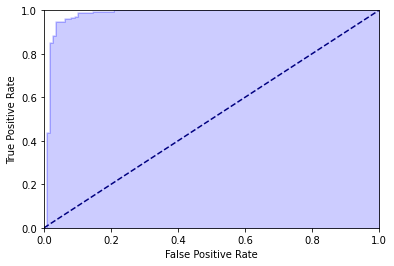

In [ ]:
from sklearn.metrics import roc_curve
# roc曲線のプロット
fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.step(fpr, tpr, color= 'b', alpha= 0.2, where = 'post')
# 曲線の内側を色塗る
plt.fill_between(fpr, tpr, step='post', alpha = 0.2, color='b')
#対角線のプロット
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# 各軸に名前をつける
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#y軸の制限
plt.ylim([0.0, 1.0])
# x軸の制限
plt.xlim([0.0, 1.0])

- ROC曲線では上記の青い部分が多いほど優れたモデルであると評価できる
- その優れたモデルかどうかを評価するのがAUC(0.5~1)の間で表現する


In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9823636363636364